In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated.csv"
data = pd.read_csv(data_path)

Exracting Google Meet Number of Meetings related metrics

In [3]:
MeetingsNo= data[["google.meet:num_meetings","time","date","year","month"]].rename(columns = {"google.meet:num_meetings": "MeetingsNumber"}) 
MeetingsNo.head(10)

,MeetingsNumber,time,date,year,month
0,0.0,2018-01-14T00:00:00.000-0500,2018-01-14,2018,1
1,0.0,2018-01-15T00:00:00.000-0500,2018-01-15,2018,1
2,0.0,2018-01-16T00:00:00.000-0500,2018-01-16,2018,1
3,0.0,2018-01-17T00:00:00.000-0500,2018-01-17,2018,1
4,0.0,2018-01-18T00:00:00.000-0500,2018-01-18,2018,1
5,0.0,2018-01-19T00:00:00.000-0500,2018-01-19,2018,1
6,0.0,2018-01-20T00:00:00.000-0500,2018-01-20,2018,1
7,0.0,2018-01-21T00:00:00.000-0500,2018-01-21,2018,1
8,0.0,2018-01-22T00:00:00.000-0500,2018-01-22,2018,1
9,0.0,2018-01-23T00:00:00.000-0500,2018-01-23,2018,1


Shape Of Data

In [3]:
MeetingsNo.shape

(543, 5)

Value counts is used to find the number of observations with metric value as 0,1,..
There are 159 observations with metric value as 0

In [4]:
counts = MeetingsNo.MeetingsNumber.value_counts()
counts.head(10)

0.0     159
1.0      28
2.0      24
9.0      23
14.0     22
3.0      18
17.0     18
7.0      17
15.0     17
13.0     16
Name: MeetingsNumber, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [5]:
mask = (MeetingsNo.MeetingsNumber< 0)
MeetingsNo[mask].head()

,MeetingsNumber,time,date,year,month


Sorting using metric values in ascending order.

In [6]:
MeetingsNo.MeetingsNumber.sort_values().head(10)

0      0.0
103    0.0
104    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
102    0.0
111    0.0
Name: MeetingsNumber, dtype: float64

describe is used to get some useful information like number of metric values and least, highest metric value

In [7]:
MeetingsNo.MeetingsNumber.describe()

count    541.000000
mean       8.613678
std        8.734379
min        0.000000
25%        0.000000
50%        7.000000
75%       15.000000
max       39.000000
Name: MeetingsNumber, dtype: float64

Maximum number of Meetings count

In [8]:
MeetingsNo.loc[MeetingsNo.MeetingsNumber.idxmax()]

MeetingsNumber                              39
time              2019-03-21T00:00:00.000-0400
date                                2019-03-21
year                                      2019
month                                        3
Name: 406, dtype: object

Minimun value in dataframe

In [9]:
MeetingsNo.loc[MeetingsNo.MeetingsNumber.idxmin()]

MeetingsNumber                               0
time              2018-01-14T00:00:00.000-0500
date                                2018-01-14
year                                      2018
month                                        1
Name: 0, dtype: object

In [10]:
MeetingsNo.groupby(['MeetingsNumber', 'date' , 'time' , 'year','month']).count().tail(10)

Empty DataFrame
Columns: []
Index: [(30.0, 2019-02-20, 2019-02-20T00:00:00.000-0500, 2019, 2), (30.0, 2019-06-26, 2019-06-26T00:00:00.000-0400, 2019, 6), (31.0, 2019-04-04, 2019-04-04T00:00:00.000-0400, 2019, 4), (32.0, 2019-04-03, 2019-04-03T00:00:00.000-0400, 2019, 4), (32.0, 2019-06-27, 2019-06-27T00:00:00.000-0400, 2019, 6), (33.0, 2019-02-05, 2019-02-05T00:00:00.000-0500, 2019, 2), (33.0, 2019-03-26, 2019-03-26T00:00:00.000-0400, 2019, 3), (34.0, 2019-05-23, 2019-05-23T00:00:00.000-0400, 2019, 5), (38.0, 2019-06-17, 2019-06-17T00:00:00.000-0400, 2019, 6), (39.0, 2019-03-21, 2019-03-21T00:00:00.000-0400, 2019, 3)]

Number of observations for each year

In [11]:
MeetingsNo.year.value_counts()

2018    328
2019    215
Name: year, dtype: int64

Number of observations for each year

In [12]:
MeetingsNo.month.value_counts()

4     60
3     60
6     54
5     54
2     53
7     51
1     49
8     41
12    31
10    31
11    30
9     29
Name: month, dtype: int64

In [13]:
MeetingsNo['MeetingsNumber'].quantile(0)

0.0

Median of metric values

In [15]:
MeetingsNo['MeetingsNumber'].quantile(0.5)

7.0

Highest Metric values are around 39. Highest Number of Meetings in a day are 39 

In [16]:
MeetingsNo['MeetingsNumber'].quantile(1.0)

39.0

Mean value is higher than median as we have maximum outliers

In [17]:
MeetingsNo['MeetingsNumber'].mean()

8.613678373382625

Mode of metric values. Total number of meetings are zero for most of the days

In [18]:
MeetingsNo['MeetingsNumber'].mode()

0    0.0
dtype: float64

Quartile

minimum value (0th percentile),
first quartile (25th percentile),
the median - second quartile (50th percentile),
third quartile(75th percentile), and
maximum value (100th percentile)
using the quantile() function:

In [20]:
five_num = [MeetingsNo['MeetingsNumber'].quantile(0),   
            MeetingsNo['MeetingsNumber'].quantile(0.25),
            MeetingsNo['MeetingsNumber'].quantile(0.50),
            MeetingsNo['MeetingsNumber'].quantile(0.75),
            MeetingsNo['MeetingsNumber'].quantile(1)]

five_num

[0.0, 0.0, 7.0, 15.0, 39.0]

Interquartile (IQR) range - distance between the 3rd quartile and the 1st quartile

In [21]:
MeetingsNo['MeetingsNumber'].quantile(0.75) - MeetingsNo['MeetingsNumber'].quantile(0.25)

15.0

Plotted all quartile values which are calculated above using box plots

We can see the highest values, there are around 2 values greater than 34 

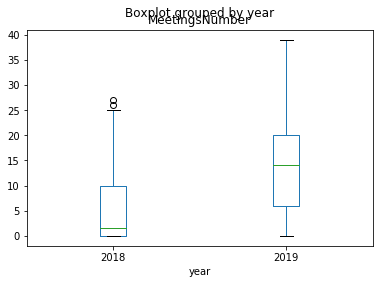

In [4]:
MeetingsNo.boxplot(by ='year', column =['MeetingsNumber'], grid = False)

In [23]:
MeetingsNo['MeetingsNumber'].var()

76.28936811117958

Standard Deviation - square root of the variance.

In [24]:
MeetingsNo['MeetingsNumber'].std()

8.734378518886137

Variance and Standard Deviation are not the right measures of spread as our data is having extreme values. So, they are susceptible to the influence of data skew and outliers as both of them are derived from the mean.

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median

Median absolute deviation is the right measure of spread for Number Of meetings metric

In [26]:
abs_median_devs = abs(MeetingsNo['MeetingsNumber']- MeetingsNo['MeetingsNumber'].median())

abs_median_devs.median() * 1.4826

10.3782